In [6]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv")
print(data)
# 转换轨迹、用地类型和出行目的字段
data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)

# 创建编码映射
unique_points = set(point for trajectory in data['轨迹'] for point in trajectory)
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

point_to_code = {str(point): chr(i+65) for i, point in enumerate(unique_points)}
land_use_to_code = {land_use: chr(i+97) for i, land_use in enumerate(unique_land_uses)}
trip_purpose_to_code = {purpose: str(i+1) for i, purpose in enumerate(unique_purposes)}

# 定义编码函数
def encode_trajectory(row):
    coded_points = [point_to_code[str(point)] for point in row['轨迹']]
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    
    encoded_trajectory = ''.join(f'{point}{land_use}{purpose}' for point, land_use, purpose in zip(coded_points, coded_land_uses, coded_purposes))
    return encoded_trajectory

# 编码轨迹
data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

# 显示或保存结果
print(data['编码轨迹'])
data.to_csv("encoded_data.csv", index=False)


       成员编号                                                 轨迹  \
0        15  [(113.33747050000001, 22.39438387), (113.33724...   
1        28  [(113.3341781, 22.39763988), (113.332594799999...   
2        39  [(113.3342884, 22.39727714), (113.332594799999...   
3        47  [(113.33541809999998, 22.39544098), (113.33259...   
4        48  [(113.33541809999998, 22.39544098), (113.33259...   
...     ...                                                ...   
4178  39962  [(113.190744, 22.63025993), (113.2123774, 22.6...   
4179  39963  [(113.190744, 22.63025993), (113.1953767999999...   
4180  39971  [(113.19235149999999, 22.63171327), (113.18824...   
4181  39977  [(113.18816129999999, 22.629551199999998), (11...   
4182  39978  [(113.18816129999999, 22.629551199999998), (11...   

                                用地类型                      出行目的  \
0             ['居住', '文体公共设施', '居住']          ['娱乐公园游玩', '回家']   
1                 ['居住', '商业', '居住']            ['购物逛街', '回家']   
2        

In [7]:
import pandas as pd
import hashlib

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv")

# 转换轨迹、用地类型和出行目的字段
data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)

# 创建编码映射
unique_points = set(point for trajectory in data['轨迹'] for point in trajectory)
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

# 使用哈希函数对轨迹点进行编码
def hash_point(point):
    # 将点转换为字符串并使用哈希函数生成哈希值
    hash_object = hashlib.md5(str(point).encode())
    # 你也可以选择使用其他哈希函数，如hashlib.sha256
    return hash_object.hexdigest()[:6]  # 使用哈希值的前6个字符作为编码

point_to_code = {str(point): hash_point(point) for point in unique_points}
land_use_to_code = {land_use: chr(i+97) for i, land_use in enumerate(unique_land_uses)}
trip_purpose_to_code = {purpose: str(i+1) for i, purpose in enumerate(unique_purposes)}

# 定义编码函数
def encode_trajectory(row):
    coded_points = [point_to_code[str(point)] for point in row['轨迹']]
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    
    encoded_trajectory = ''.join(f'{point}{land_use}{purpose}' for point, land_use, purpose in zip(coded_points, coded_land_uses, coded_purposes))
    return encoded_trajectory

# 编码轨迹
data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

# 显示或保存结果
print(data['编码轨迹'])
data.to_csv("encoded_data.csv", index=False)


0                       92f3a3a8e6ba9dg7
1                       f13ea3a69af78dh7
2                       479407a59af78dh7
3                       b16323a69af78dh7
4                       b16323a69af78dh7
                      ...               
4178    1d9abea2fcde7ad71d9abea2fcde7ad7
4179                    1d9abea6219036h7
4180                    56b4dea8269b73b7
4181            6801c4a5219036h876c5f6b7
4182            6801c4a5219036h876c5f6b7
Name: 编码轨迹, Length: 4183, dtype: object


In [31]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv")

# 转换轨迹、用地类型和出行目的字段
data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)
data['出行时间'] = data['出行时间'].apply(eval)

# 创建编码映射
unique_points = set(point for trajectory in data['轨迹'] for point in trajectory)
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

# 使用数字编码对轨迹点进行编码，并添加前缀“PT”表示点
point_to_code = {str(point): f"PT{i+1}" for i, point in enumerate(unique_points)}
land_use_to_code = {land_use: f"LU{i+1}" for i, land_use in enumerate(unique_land_uses)}  # 保持一致性，添加前缀
trip_purpose_to_code = {purpose: f"TP{i+1}" for i, purpose in enumerate(unique_purposes)}  # 保持一致性，添加前缀


# 普通编码
# def encode_trajectory(row):
#     coded_points = [point_to_code[str(point)] for point in row['轨迹']]
#     coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
#     coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]

#     # 初始化编码字符串列表
#     encoded_strs = []

#     # 遍历每个点，添加点和用地类型的编码，然后（如果可能的话）添加出行目的的编码
#     for i in range(len(coded_points)):
#         encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_")
#         if i < len(coded_purposes):  # 如果还有出行目的的编码可以添加
#             encoded_strs.append(f"{coded_purposes[i]}_")

#     # 最后删除字符串末尾的下划线，并返回结果
#     encoded_trajectory = ''.join(encoded_strs)
#     return encoded_trajectory.rstrip('_')

# 考虑停留时间
from datetime import datetime

def calculate_dwell_time(travel_times):
    dwell_times = [0]  # 第一个点的停留时间默认为0
    for i in range(len(travel_times)-1):
        arrival_at_next = datetime.strptime(travel_times[i][1], '%H:%M:%S')
        departure_from_next = datetime.strptime(travel_times[i+1][0], '%H:%M:%S')
        dwell_time = (departure_from_next - arrival_at_next).seconds / 60  # 计算停留时间，转换为分钟
        dwell_times.append(dwell_time)
    dwell_times.append(0)  # 最后一个点的停留时间也是0
    return dwell_times

data['停留时间'] = data['出行时间'].apply(calculate_dwell_time)

def encode_trajectory(row):
    coded_points = [point_to_code[str(point)] for point in row['轨迹']]
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    coded_dwell_times = [f"DT{int(dwell_time)}" for dwell_time in row['停留时间']]  # 将停留时间转换为编码

    encoded_strs = []

    for i in range(len(coded_points)):
        encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_{coded_dwell_times[i]}_")
        if i < len(coded_purposes):  # 如果还有出行目的的编码可以添加
            encoded_strs.append(f"{coded_purposes[i]}_")

    encoded_trajectory = ''.join(encoded_strs)
    return encoded_trajectory.rstrip('_')


# 编码轨迹
data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

# 显示或保存结果
print(data['编码轨迹'])
data.to_csv("encoded_data.csv", index=False)


0       PT1545_LU8_DT0_TP6_PT3790_LU4_DT58_TP8_PT1545_...
1       PT962_LU8_DT0_TP3_PT1357_LU1_DT59_TP8_PT962_LU...
2       PT468_LU8_DT0_TP1_PT1357_LU1_DT49_TP8_PT468_LU...
3       PT4677_LU8_DT0_TP3_PT1357_LU1_DT50_TP8_PT4677_...
4       PT4677_LU8_DT0_TP3_PT1357_LU1_DT50_TP8_PT4677_...
                              ...                        
4178    PT3923_LU8_DT0_TP9_PT5897_LU2_DT240_TP8_PT3923...
4179    PT3923_LU8_DT0_TP3_PT3285_LU1_DT110_TP8_PT3923...
4180    PT6900_LU8_DT0_TP6_PT4435_LU9_DT105_TP8_PT6900...
4181    PT4534_LU8_DT0_TP1_PT3285_LU1_DT45_TP6_PT5858_...
4182    PT4534_LU8_DT0_TP1_PT3285_LU1_DT50_TP6_PT5858_...
Name: 编码轨迹, Length: 4183, dtype: object


In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 读取CSV文件
data = pd.read_csv("encoded_data.csv")

# 使用TF-IDF进行向量化
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b\w+\b')
X_vectorized = vectorizer.fit_transform(data['编码轨迹'])

# 设置K-Means模型
n_clusters = 7  # 你可以设置不同的聚类数量
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)

# 拟合模型
clusters = km.fit_predict(X_vectorized)

# 将分类标签添加到原始数据框
data['cluster'] = clusters

# 分类结果概览
for i in range(n_clusters):
    cluster_data = data[data['cluster'] == i]
    print(f'Cluster {i}:')
    print(cluster_data.head())  # 使用head()方法查看每个群集的前几行，您也可以使用其他方法来分析每个群集的特征


data.to_csv("cluster_data.csv", index=False)

# 这个分类有点不太合理，很多都分到一个类去了，其他的类只有1条数据

Cluster 0:
   成员编号                                                 轨迹  \
0    15  [(113.33747050000001, 22.39438387), (113.33724...   
1    28  [(113.3341781, 22.39763988), (113.332594799999...   
2    39  [(113.3342884, 22.39727714), (113.332594799999...   
3    47  [(113.33541809999998, 22.39544098), (113.33259...   
4    48  [(113.33541809999998, 22.39544098), (113.33259...   

                     用地类型              出行目的  \
0  ['居住', '文体公共设施', '居住']  ['娱乐公园游玩', '回家']   
1      ['居住', '商业', '居住']    ['购物逛街', '回家']   
2      ['居住', '商业', '居住']    ['外出就餐', '回家']   
3      ['居住', '商业', '居住']    ['购物逛街', '回家']   
4      ['居住', '商业', '居住']    ['购物逛街', '回家']   

                                               出行时间  年龄 性别  \
0  [('6:01:00', '6:06:00'), ('7:04:00', '7:12:00')]  65  男   
1  [('7:06:00', '7:13:00'), ('8:12:00', '8:18:00')]  62  女   
2  [('7:06:00', '7:12:00'), ('8:01:00', '8:07:00')]  56  男   
3  [('6:00:00', '6:10:00'), ('7:00:00', '7:10:00')]  67  男   
4  [('6:00:00', '6:10:0

In [19]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# 尝试使用不同数量的簇
for n_clusters in range(2, 10):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
    clusters = km.fit_predict(X_vectorized)
    
    # 计算轮廓系数
    silhouette_score = metrics.silhouette_score(X_vectorized, clusters)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_score}")

    # 计算Davies-Bouldin Index
    db_score = metrics.davies_bouldin_score(X_vectorized.toarray(), clusters)
    print(f"Number of clusters: {n_clusters}, Davies-Bouldin Index: {db_score}")


Number of clusters: 2, Silhouette Score: 1.4752026157935461e-05
Number of clusters: 2, Davies-Bouldin Index: 0.999746157430211
Number of clusters: 3, Silhouette Score: 1.4755555350797548e-05
Number of clusters: 3, Davies-Bouldin Index: 0.9997460931949796
Number of clusters: 4, Silhouette Score: 1.4759086232672913e-05
Number of clusters: 4, Davies-Bouldin Index: 0.9997460289273283
Number of clusters: 5, Silhouette Score: 1.4762618804922847e-05
Number of clusters: 5, Davies-Bouldin Index: 0.9997459646272324
Number of clusters: 6, Silhouette Score: 1.4766153068467742e-05
Number of clusters: 6, Davies-Bouldin Index: 0.999745900294667
Number of clusters: 7, Silhouette Score: 0.0014488138202047188
Number of clusters: 7, Davies-Bouldin Index: 0.9997459869746341
Number of clusters: 8, Silhouette Score: 0.0004927879645177134
Number of clusters: 8, Davies-Bouldin Index: 0.9997458218253839
Number of clusters: 9, Silhouette Score: 0.0004927914781092417
Number of clusters: 9, Davies-Bouldin Index: 

In [22]:
from kmodes.kmodes import KModes

# 定义和拟合模型
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# 将结果添加到数据帧
data['cluster'] = clusters

# 分析结果
for i in set(clusters):
    cluster_data = data[data['cluster'] == i]
    print(f'Cluster {i}:')
    print(cluster_data['编码轨迹'].value_counts())  # 输出每个簇的最常见的轨迹
    # 进一步分析每个簇的特点
data.to_csv("cluster_data.csv", index=False)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1039, cost: 26282.0
Run 1, iteration: 2/100, moves: 354, cost: 26193.0
Run 1, iteration: 3/100, moves: 4, cost: 26193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1061, cost: 26728.0
Run 2, iteration: 2/100, moves: 134, cost: 26697.0
Run 2, iteration: 3/100, moves: 40, cost: 26697.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1268, cost: 26874.0
Run 3, iteration: 2/100, moves: 212, cost: 26874.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 673, cost: 26471.0
Run 4, iteration: 2/100, moves: 28, cost: 26470.0
Run 4, iteration: 3/100, moves: 0, cost: 26470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 923, cost:

In [33]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv")

# 转换轨迹、用地类型和出行目的字段
data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)
data['出行时间'] = data['出行时间'].apply(eval)

# 创建编码映射
unique_points = set(point for trajectory in data['轨迹'] for point in trajectory)
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

# 使用数字编码对轨迹点进行编码，并添加前缀“PT”表示点
point_to_code = {str(point): f"PT{i+1}" for i, point in enumerate(unique_points)}
land_use_to_code = {land_use: f"LU{i+1}" for i, land_use in enumerate(unique_land_uses)}  # 保持一致性，添加前缀
trip_purpose_to_code = {purpose: f"TP{i+1}" for i, purpose in enumerate(unique_purposes)}  # 保持一致性，添加前缀


# 普通编码
# def encode_trajectory(row):
#     coded_points = [point_to_code[str(point)] for point in row['轨迹']]
#     coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
#     coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]

#     # 初始化编码字符串列表
#     encoded_strs = []

#     # 遍历每个点，添加点和用地类型的编码，然后（如果可能的话）添加出行目的的编码
#     for i in range(len(coded_points)):
#         encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_")
#         if i < len(coded_purposes):  # 如果还有出行目的的编码可以添加
#             encoded_strs.append(f"{coded_purposes[i]}_")

#     # 最后删除字符串末尾的下划线，并返回结果
#     encoded_trajectory = ''.join(encoded_strs)
#     return encoded_trajectory.rstrip('_')

# 考虑停留时间
from datetime import datetime

def calculate_dwell_time(travel_times):
    dwell_times = [0]  # 第一个点的停留时间默认为0
    for i in range(len(travel_times)-1):
        arrival_at_next = datetime.strptime(travel_times[i][1], '%H:%M:%S')
        departure_from_next = datetime.strptime(travel_times[i+1][0], '%H:%M:%S')
        dwell_time = (departure_from_next - arrival_at_next).seconds / 60  # 计算停留时间，转换为分钟
        dwell_times.append(dwell_time)
    dwell_times.append(0)  # 最后一个点的停留时间也是0
    return dwell_times

data['停留时间'] = data['出行时间'].apply(calculate_dwell_time)

def encode_trajectory(row):
    coded_points = [point_to_code[str(point)] for point in row['轨迹']]
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    coded_dwell_times = [f"DT{int(dwell_time)}" for dwell_time in row['停留时间']]  # 将停留时间转换为编码

    encoded_strs = []

    for i in range(len(coded_points)):
        encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_{coded_dwell_times[i]}_")
        if i < len(coded_purposes):  # 如果还有出行目的的编码可以添加
            encoded_strs.append(f"{coded_purposes[i]}_")

    encoded_trajectory = ''.join(encoded_strs)
    return encoded_trajectory.rstrip('_')


# 编码轨迹
data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

# 显示或保存结果
print(data['编码轨迹'])
data.to_csv("encoded_data.csv", index=False)


0       PT1545_LU8_DT0_TP6_PT3790_LU4_DT58_TP8_PT1545_...
1       PT962_LU8_DT0_TP3_PT1357_LU1_DT59_TP8_PT962_LU...
2       PT468_LU8_DT0_TP1_PT1357_LU1_DT49_TP8_PT468_LU...
3       PT4677_LU8_DT0_TP3_PT1357_LU1_DT50_TP8_PT4677_...
4       PT4677_LU8_DT0_TP3_PT1357_LU1_DT50_TP8_PT4677_...
                              ...                        
4178    PT3923_LU8_DT0_TP9_PT5897_LU2_DT240_TP8_PT3923...
4179    PT3923_LU8_DT0_TP3_PT3285_LU1_DT110_TP8_PT3923...
4180    PT6900_LU8_DT0_TP6_PT4435_LU9_DT105_TP8_PT6900...
4181    PT4534_LU8_DT0_TP1_PT3285_LU1_DT45_TP6_PT5858_...
4182    PT4534_LU8_DT0_TP1_PT3285_LU1_DT50_TP6_PT5858_...
Name: 编码轨迹, Length: 4183, dtype: object


# 经纬度无独特编码-DBSCAN聚类，eps和min_sample

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

# 读取CSV文件
data = pd.read_csv("encoded_data_ceshi.csv")


data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)
data['出行时间'] = data['出行时间'].apply(eval)

unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

land_use_to_code = {land_use: i+1 for i, land_use in enumerate(unique_land_uses)}
trip_purpose_to_code = {purpose: i+1 for i, purpose in enumerate(unique_purposes)}

points = []
attributes = []

# Flatten trajectories and their attributes
for _, row in data.iterrows():
    for idx, point in enumerate(row['轨迹']):
        if idx == 0:  # 如果是第一个点
            continue  # 跳过第一个点
        lu_code = land_use_to_code[row['用地类型'][idx]]
        tp_code = trip_purpose_to_code[row['出行目的'][idx - 1]]
        attributes.append((lu_code, tp_code))
        points.append(point)



points = np.array(points)
# print("points:", points)
attributes = np.array(attributes)
# print("attributes:",attributes)

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(coord1, coord2):
    R = 6371e3  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (sin(dlat / 2) ** 2 + 
         cos(radians(lat1)) * cos(radians(lat2)) * 
         sin(dlon / 2) ** 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


# Custom metric to consider spatial distance and attribute similarity
def custom_metric(a, b):
    spatial_dist = haversine_distance(a[:2], b[:2])
#     if a[3] != b[2] or a[2] != b[3]:  # Compare previous TP with current LU and vice-versa
    if a[2] != b[2] or a[3] != b[3]:  # Compare previous TP with current LU and vice-versa
        attribute_dist = 1e6  # Assign a large distance if they don't match
    else:
        attribute_dist = 0
    
    return spatial_dist + attribute_dist

# DBSCAN clustering
# clustering = DBSCAN(eps=590, min_samples=2, metric=custom_metric).fit(np.hstack((points, attributes)))
# 计算每个点到其他所有点的平均距离
avg_distances = []
for point in points:
    distances_to_other_points = [haversine_distance(point, other_point) for other_point in points]
    avg_distance = sum(distances_to_other_points) / len(distances_to_other_points)
    avg_distances.append(avg_distance)

# # 设置一个阈值并排除那些平均距离较大的点
# threshold = np.percentile(avg_distances, 75)
# filtered_points = np.array([point for idx, point in enumerate(points) if avg_distances[idx] <= threshold])
# filtered_attributes = np.array([attr for idx, attr in enumerate(attributes) if avg_distances[idx] <= threshold])

# 对筛选后的点进行DBSCAN聚类
# clustering = DBSCAN(eps=50, min_samples=2, metric=custom_metric).fit(np.hstack((filtered_points, filtered_attributes)))
clustering = DBSCAN(eps=10, min_samples=5, metric=custom_metric).fit(np.hstack((points, attributes)))




# Find centroid for each cluster
cluster_centroids = {}

for cluster_label in set(clustering.labels_):
    if cluster_label != -1:  # -1 label is for noise
#         members = filtered_points[clustering.labels_ == cluster_label]
        members = points[clustering.labels_ == cluster_label]
        centroid = members.mean(axis=0)
        cluster_centroids[cluster_label] = centroid        
        
# Replace points with their cluster centroid
# Create a mapping of original points to their cluster centroids
point_to_cluster_centroid = {}

for i, label in enumerate(clustering.labels_):
    if label != -1:
#         point_to_cluster_centroid[tuple(filtered_points[i])] = cluster_centroids[label]
        point_to_cluster_centroid[tuple(points[i])] = cluster_centroids[label]


# Replace points in the trajectory with their corresponding cluster centroid using the mapping
new_trajectories = []
has_changes = []  # 列表用于记录该轨迹的点是否已被更改
cluster_of_points = []  # 列表用于记录点属于哪个簇

for trajectory in data['轨迹']:
    new_trajectory = []
    trajectory_changes = []
    trajectory_clusters = []
    for idx, point in enumerate(trajectory):
        if idx != 0 and point in point_to_cluster_centroid:
            new_trajectory.append(point_to_cluster_centroid[point])
            trajectory_changes.append(True)  # 标记点已更改
            # 记录点的簇编号
            for i, label in enumerate(clustering.labels_):
                if tuple(points[i]) == point:
                    trajectory_clusters.append(label)
                    break
        else:
            new_trajectory.append(point)
            trajectory_changes.append(False)  # 标记点未更改
            trajectory_clusters.append(-1)  # 未进行聚类的点的标签为-1

    new_trajectories.append(new_trajectory)
    has_changes.append(trajectory_changes)
    cluster_of_points.append(trajectory_clusters)



# Add the new trajectories as a new column in the dataframe
data['新轨迹'] = new_trajectories
data['是否更改'] = has_changes
data['簇编号'] = cluster_of_points



# 创建编码映射
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

land_use_to_code = {land_use: f"LU{i+1}" for i, land_use in enumerate(unique_land_uses)}  # 保持一致性，添加前缀
trip_purpose_to_code = {purpose: f"TP{i+1}" for i, purpose in enumerate(unique_purposes)}  # 保持一致性，添加前缀

from datetime import datetime

def calculate_dwell_time(travel_times):
    dwell_times = [0]
    for i in range(len(travel_times)-1):
        arrival_at_next = datetime.strptime(travel_times[i][1], '%H:%M:%S')
        departure_from_next = datetime.strptime(travel_times[i+1][0], '%H:%M:%S')
        dwell_time = (departure_from_next - arrival_at_next).seconds / 60
        dwell_times.append(dwell_time)
    dwell_times.append(0)
    return dwell_times

data['停留时间'] = data['出行时间'].apply(calculate_dwell_time)



def encode_trajectory(row):
    coded_points = [f"PT({point[0]},{point[1]})" for point in row['新轨迹']]  # 直接使用经纬度坐标
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    coded_dwell_times = [f"DT{int(dwell_time)}" for dwell_time in row['停留时间']]

    encoded_strs = []

    for i in range(len(coded_points)):
        encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_{coded_dwell_times[i]}_")
        if i < len(coded_purposes):
            encoded_strs.append(f"{coded_purposes[i]}_")

    encoded_trajectory = ''.join(encoded_strs)
    return encoded_trajectory.rstrip('_')

data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

print(data['编码轨迹'])
data.to_csv("encoded_data.csv", index=False)


# 1031用到的分类代码

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
import math

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv", encoding='gbk')


data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)
# data['新附近POI'] = data['新附近POI'].apply(eval)
# data['新POI地址'] = data['新POI地址'].apply(eval)
# data['新POI距离'] = data['新POI距离'].apply(eval)
data['出行时间'] = data['出行时间'].apply(eval)

import numpy as np

def safe_eval(x):
    try:
        return eval(x) if not pd.isna(x) else np.nan
    except NameError:
        return np.nan

data['新附近POI'] = data['新附近POI'].apply(safe_eval)
data['新POI地址'] = data['新POI地址'].apply(safe_eval)
data['新POI距离'] = data['新POI距离'].apply(safe_eval)


unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)
# unique_pois = set(poi for pois in data['新附近POI'] for poi in pois)
# unique_poi_addresses = set(poi_address for poi_addresses in data['新POI地址'] for poi_address in poi_addresses)
# unique_poi_distances = set(poi_distance for poi_distances in data['新POI地址'] for poi_distance in poi_distances)

unique_pois = set(poi for pois in data['新附近POI'] if isinstance(pois, list) for poi in pois)
unique_poi_addresses = set(poi_address for poi_addresses in data['新POI地址'] if isinstance(poi_addresses, list) for poi_address in poi_addresses)
# Make sure to correct the field to '新POI距离' if that's the intended field for distances
unique_poi_distances = set(poi_distance for poi_distances in data['新POI距离'] if isinstance(poi_distances, list) for poi_distance in poi_distances)


land_use_to_code = {land_use: i+1 for i, land_use in enumerate(unique_land_uses)}
trip_purpose_to_code = {purpose: i+1 for i, purpose in enumerate(unique_purposes)}
poi_to_code = {poi: i+1 for i, poi in enumerate(unique_pois)}
poi_address_to_code = {poi_address: i+1 for i, poi_address in enumerate(unique_poi_addresses)}
poi_distance_to_code = {poi_distance: i+1 for i, poi_distance in enumerate(unique_poi_distances)}

points = []
attributes = []

# Flatten trajectories and their attributes
for _, row in data.iterrows():
    member_id = row['成员编号']
    for idx, point in enumerate(row['轨迹']):
        if idx == 0:
            continue
        # 新增此行来跳过出行目的为“回家”的点
#         if row['出行目的'][idx - 1] == '回家':
#             continue
        lu_code = land_use_to_code[row['用地类型'][idx]]
        tp_code = trip_purpose_to_code[row['出行目的'][idx - 1]]
#         poi_value = row.get('新附近POI', [])
#         poi_code = 'DefaultPOI' if (isinstance(poi_value, float) and math.isnan(poi_value)) or not poi_value else poi_to_code.get(poi_value[idx], 'DefaultPOI')

#         pa_value = row.get('新POI地址', [])
#         pa_code = 'DefaultAddress' if (isinstance(pa_value, float) and math.isnan(pa_value)) or not pa_value else poi_address_to_code.get(pa_value[idx], 'DefaultAddress')

#         pd_value = row.get('新POI距离', [])
#         pd_code = 'DefaultDistance' if (isinstance(pd_value, float) and math.isnan(pd_value)) or not pd_value else poi_distance_to_code.get(pd_value[idx], 'DefaultDistance')
        
        attributes.append((lu_code, tp_code, member_id, poi_code, pa_code, pd_code))
        attributes.append((lu_code, tp_code, member_id))
        points.append(point)
# 纬度 (a[0] 和 b[0]，这里是 points 中的第一个元素)
# 经度 (a[1] 和 b[1]，这里是 points 中的第二个元素)
# 用地类型编码 (a[2] 和 b[2]，这里是 attributes 的第一个元素)
# 出行目的编码 (a[3] 和 b[3]，这里是 attributes 的第二个元素)
# 成员编号 (a[4] 和 b[4]，这里是 attributes 的第三个元素)
# 附近POI (a[5] 和 b[5]，这里是 attributes 的第四个元素)
# 附近POI地址 (a[6] 和 b[6]，这里是 attributes 的第五个元素)
# 附近POI距离 (a[7] 和 b[7]，这里是 attributes 的第六个元素)

points = np.array(points)
# print("points:", points)
attributes = np.array(attributes)
# print("attributes:",attributes)

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(coord1, coord2):
    R = 6371e3  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (sin(dlat / 2) ** 2 + 
         cos(radians(lat1)) * cos(radians(lat2)) * 
         sin(dlon / 2) ** 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


# Custom metric to consider spatial distance and attribute similarity
# 纬度 (a[0] 和 b[0]，这里是 points 中的第一个元素)
# 经度 (a[1] 和 b[1]，这里是 points 中的第二个元素)
# 用地类型编码 (a[2] 和 b[2]，这里是 attributes 的第一个元素)
# 出行目的编码 (a[3] 和 b[3]，这里是 attributes 的第二个元素)
# 成员编号 (a[4] 和 b[4]，这里是 attributes 的第三个元素)
# 附近POI (a[5] 和 b[5]，这里是 attributes 的第四个元素)
# 附近POI地址 (a[6] 和 b[6]，这里是 attributes 的第五个元素)
# 附近POI距离 (a[7] 和 b[7]，这里是 attributes 的第六个元素)
def custom_metric(a, b):
#     spatial_dist = haversine_distance(a[:2], b[:2])
    # 当点来自同一成员时，设置一个大的距离值
    # 只有在用地类型和出行目的都匹配时属性距离为0，其他情况为1e6
    if a[5] == b[5] and a[7] == 0 and b[7] == 0:
        spatial_dist = 0  # 坐标点相同，空间距离为0
    else:
        spatial_dist = 1e6
        
#     if a[0] == b[0] and a[1] == b[1]:
#         spatial_dist = 0  # 坐标点相同，空间距离为0
#     else:
#         spatial_dist = 1e6
        
    if a[3] == b[3] and a[4] != b[4]:
        attribute_dist = 0  # 用地类型和出行目的都匹配
    else:
        attribute_dist = 1e6  # 任一不匹配则属性距离很大
        
    return spatial_dist + attribute_dist

# DBSCAN clustering
# clustering = DBSCAN(eps=590, min_samples=2, metric=custom_metric).fit(np.hstack((points, attributes)))
# 计算每个点到其他所有点的平均距离
avg_distances = []
for point in points:
    distances_to_other_points = [haversine_distance(point, other_point) for other_point in points]
    avg_distance = sum(distances_to_other_points) / len(distances_to_other_points)
    avg_distances.append(avg_distance)

default_poi_numeric_value = -1

# Replace 'DefaultPOI' and similar placeholders with the numeric value you've chosen
attributes[attributes == 'DefaultPOI'] = default_poi_numeric_value
attributes[attributes == 'DefaultAddress'] = default_poi_numeric_value
attributes[attributes == 'DefaultDistance'] = default_poi_numeric_value

# # 设置一个阈值并排除那些平均距离较大的点
# threshold = np.percentile(avg_distances, 75)
# filtered_points = np.array([point for idx, point in enumerate(points) if avg_distances[idx] <= threshold])
# filtered_attributes = np.array([attr for idx, attr in enumerate(attributes) if avg_distances[idx] <= threshold])

# 对筛选后的点进行DBSCAN聚类
# clustering = DBSCAN(eps=50, min_samples=2, metric=custom_metric).fit(np.hstack((filtered_points, filtered_attributes)))
clustering = DBSCAN(eps=50, min_samples=2, metric=custom_metric).fit(np.hstack((points, attributes)))




# Find centroid for each cluster
cluster_centroids = {}

for cluster_label in set(clustering.labels_):
    if cluster_label != -1:  # -1 label is for noise
#         members = filtered_points[clustering.labels_ == cluster_label]
        members = points[clustering.labels_ == cluster_label]
        centroid = members.mean(axis=0)
        cluster_centroids[cluster_label] = centroid        
        
# Replace points with their cluster centroid
# Create a mapping of original points to their cluster centroids
point_to_cluster_centroid = {}

for i, label in enumerate(clustering.labels_):
    if label != -1:
#         point_to_cluster_centroid[tuple(filtered_points[i])] = cluster_centroids[label]
        point_to_cluster_centroid[tuple(points[i])] = cluster_centroids[label]


# Replace points in the trajectory with their corresponding cluster centroid using the mapping
new_trajectories = []
has_changes = []  # 列表用于记录该轨迹的点是否已被更改
cluster_of_points = []  # 列表用于记录点属于哪个簇

for trajectory in data['轨迹']:
    new_trajectory = []
    trajectory_changes = []
    trajectory_clusters = []
    for idx, point in enumerate(trajectory):
        if idx != 0 and point in point_to_cluster_centroid:
            new_trajectory.append(point_to_cluster_centroid[point])
            trajectory_changes.append(True)  # 标记点已更改
            # 记录点的簇编号
            for i, label in enumerate(clustering.labels_):
                if tuple(points[i]) == point:
                    trajectory_clusters.append(label)
                    break
        else:
            new_trajectory.append(point)
            trajectory_changes.append(False)  # 标记点未更改
            trajectory_clusters.append(-1)  # 未进行聚类的点的标签为-1

    new_trajectories.append(new_trajectory)
    has_changes.append(trajectory_changes)
    cluster_of_points.append(trajectory_clusters)



# Add the new trajectories as a new column in the dataframe
data['新轨迹'] = new_trajectories
data['是否更改'] = has_changes
data['簇编号'] = cluster_of_points



# 创建编码映射
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

land_use_to_code = {land_use: f"LU{i+1}" for i, land_use in enumerate(unique_land_uses)}  # 保持一致性，添加前缀
trip_purpose_to_code = {purpose: f"TP{i+1}" for i, purpose in enumerate(unique_purposes)}  # 保持一致性，添加前缀

from datetime import datetime

def calculate_dwell_time(travel_times):
    dwell_times = [0]
    for i in range(len(travel_times)-1):
        arrival_at_next = datetime.strptime(travel_times[i][1], '%H:%M:%S')
        departure_from_next = datetime.strptime(travel_times[i+1][0], '%H:%M:%S')
        dwell_time = (departure_from_next - arrival_at_next).seconds / 60
        dwell_times.append(dwell_time)
    dwell_times.append(0)
    return dwell_times

data['停留时间'] = data['出行时间'].apply(calculate_dwell_time)



def encode_trajectory(row):
    coded_points = [f"PT({point[0]},{point[1]})" for point in row['新轨迹']]  # 直接使用经纬度坐标
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    coded_dwell_times = [f"DT{int(dwell_time)}" for dwell_time in row['停留时间']]

    encoded_strs = []

    for i in range(len(coded_points)):
        encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_{coded_dwell_times[i]}_")
        if i < len(coded_purposes):
            encoded_strs.append(f"{coded_purposes[i]}_")

    encoded_trajectory = ''.join(encoded_strs)
    return encoded_trajectory.rstrip('_')

data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

print(data['编码轨迹'])
data.to_csv("encoded_data2.csv", index=False)


NameError: name 'poi_code' is not defined

# 层次聚类方法

In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import pairwise_distances

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv")


data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)
data['出行时间'] = data['出行时间'].apply(eval)

unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

land_use_to_code = {land_use: i+1 for i, land_use in enumerate(unique_land_uses)}
trip_purpose_to_code = {purpose: i+1 for i, purpose in enumerate(unique_purposes)}

points = []
attributes = []

# Flatten trajectories and their attributes
for _, row in data.iterrows():
    member_id = row['成员编号']
    for idx, point in enumerate(row['轨迹']):
        if idx == 0:
            continue
        lu_code = land_use_to_code[row['用地类型'][idx]]
        tp_code = trip_purpose_to_code[row['出行目的'][idx - 1]]
        attributes.append((lu_code, tp_code, member_id))
        points.append(point)



points = np.array(points)
# print("points:", points)
attributes = np.array(attributes)
# print("attributes:",attributes)

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(coord1, coord2):
    R = 6371e3  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (sin(dlat / 2) ** 2 + 
         cos(radians(lat1)) * cos(radians(lat2)) * 
         sin(dlon / 2) ** 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


# Custom metric to consider spatial distance and attribute similarity
def custom_metric(a, b):
    spatial_dist = haversine_distance(a[:2], b[:2])
    # 当点来自同一成员时，设置一个大的距离值
    if a[-1] == b[-1]:  # 假设成员的标识符存储在属性数组的最后一个位置
        return 1e6
    
#     if a[3] != b[2] or a[2] != b[3]:  # Compare previous TP with current LU and vice-versa
    if a[2] != b[2] or a[3] != b[3]:  # Compare previous TP with current LU and vice-versa
        attribute_dist = 1e6  # Assign a large distance if they don't match
    else:
        attribute_dist = 0
    
    return spatial_dist + attribute_dist

# Agglomerative clustering
# 创建一个包装器函数来计算距离矩阵
def distance_matrix(X):
    return pairwise_distances(X, metric=custom_metric)

# 现在你可以将 distance_matrix 函数传递给 AgglomerativeClustering
clustering = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=50,
    linkage='complete',
    affinity=distance_matrix  # 将 distance_matrix 函数赋值给 affinity 参数
).fit(np.hstack((points, attributes)))




# Find centroid for each cluster
cluster_centroids = {}

for cluster_label in set(clustering.labels_):
#     members = filtered_points[clustering.labels_ == cluster_label]
    members = points[clustering.labels_ == cluster_label]
    centroid = members.mean(axis=0)
    cluster_centroids[cluster_label] = centroid        
        
# Replace points with their cluster centroid
# Create a mapping of original points to their cluster centroids
point_to_cluster_centroid = {}

for i, label in enumerate(clustering.labels_):
    if label != -1:
#         point_to_cluster_centroid[tuple(filtered_points[i])] = cluster_centroids[label]
        point_to_cluster_centroid[tuple(points[i])] = cluster_centroids[label]


# Replace points in the trajectory with their corresponding cluster centroid using the mapping
new_trajectories = []
has_changes = []  # 列表用于记录该轨迹的点是否已被更改
cluster_of_points = []  # 列表用于记录点属于哪个簇

for trajectory in data['轨迹']:
    new_trajectory = []
    trajectory_changes = []
    trajectory_clusters = []
    for idx, point in enumerate(trajectory):
        if idx != 0 and point in point_to_cluster_centroid:
            new_trajectory.append(point_to_cluster_centroid[point])
            trajectory_changes.append(True)  # 标记点已更改
            # 记录点的簇编号
            for i, label in enumerate(clustering.labels_):
                if tuple(points[i]) == point:
                    trajectory_clusters.append(label)
                    break
        else:
            new_trajectory.append(point)
            trajectory_changes.append(False)  # 标记点未更改
            trajectory_clusters.append(-1)  # 未进行聚类的点的标签为-1

    new_trajectories.append(new_trajectory)
    has_changes.append(trajectory_changes)
    cluster_of_points.append(trajectory_clusters)



# Add the new trajectories as a new column in the dataframe
data['新轨迹'] = new_trajectories
data['是否更改'] = has_changes
data['簇编号'] = cluster_of_points



# 创建编码映射
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
unique_purposes = set(purpose for purposes in data['出行目的'] for purpose in purposes)

land_use_to_code = {land_use: f"LU{i+1}" for i, land_use in enumerate(unique_land_uses)}  # 保持一致性，添加前缀
trip_purpose_to_code = {purpose: f"TP{i+1}" for i, purpose in enumerate(unique_purposes)}  # 保持一致性，添加前缀

from datetime import datetime

def calculate_dwell_time(travel_times):
    dwell_times = [0]
    for i in range(len(travel_times)-1):
        arrival_at_next = datetime.strptime(travel_times[i][1], '%H:%M:%S')
        departure_from_next = datetime.strptime(travel_times[i+1][0], '%H:%M:%S')
        dwell_time = (departure_from_next - arrival_at_next).seconds / 60
        dwell_times.append(dwell_time)
    dwell_times.append(0)
    return dwell_times

data['停留时间'] = data['出行时间'].apply(calculate_dwell_time)



def encode_trajectory(row):
    coded_points = [f"PT({point[0]},{point[1]})" for point in row['新轨迹']]  # 直接使用经纬度坐标
    coded_land_uses = [land_use_to_code[land_use] for land_use in row['用地类型']]
    coded_purposes = [trip_purpose_to_code[purpose] for purpose in row['出行目的']]
    coded_dwell_times = [f"DT{int(dwell_time)}" for dwell_time in row['停留时间']]

    encoded_strs = []

    for i in range(len(coded_points)):
        encoded_strs.append(f"{coded_points[i]}_{coded_land_uses[i]}_{coded_dwell_times[i]}_")
        if i < len(coded_purposes):
            encoded_strs.append(f"{coded_purposes[i]}_")

    encoded_trajectory = ''.join(encoded_strs)
    return encoded_trajectory.rstrip('_')

data['编码轨迹'] = data.apply(encode_trajectory, axis=1)

print(data['编码轨迹'])
data.to_csv("encoded_data.csv", index=False)


0       PT(113.33747050000001,22.39438387)_LU3_DT0_TP1...
1       PT(113.3341781,22.39763988)_LU3_DT0_TP6_PT(113...
2       PT(113.3342884,22.39727714)_LU3_DT0_TP5_PT(113...
3       PT(113.33541809999998,22.39544098)_LU3_DT0_TP6...
4       PT(113.33541809999998,22.39544098)_LU3_DT0_TP6...
                              ...                        
4178    PT(113.190744,22.63025993)_LU3_DT0_TP8_PT(113....
4179    PT(113.190744,22.63025993)_LU3_DT0_TP6_PT(113....
4180    PT(113.19235149999999,22.63171327)_LU3_DT0_TP1...
4181    PT(113.18816129999999,22.629551199999998)_LU3_...
4182    PT(113.18816129999999,22.629551199999998)_LU3_...
Name: 编码轨迹, Length: 4183, dtype: object


In [ ]:
# 为了排除那些距离大多数点特别远的点，您可以使用以下策略：

# 计算所有点之间的距离：使用您的haversine_distance函数为每一对点计算距离。
# 为每个点计算平均距离：根据上述距离矩阵，为每个点计算与其他点的平均距离。
# 设置一个阈值并排除那些平均距离较大的点：选择一个阈值（例如，所有点的平均距离的75th百分位数），并排除那些其平均距离大于此阈值的点。
# 对剩余的点进行聚类：使用DBSCAN或其他您选择的聚类方法对筛选后的点进行聚类。

# eps应该选择多少合适?

# 遗传算法

In [55]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 对于每个 distance_threshold 值运行聚类算法
# distance_thresholds = [10, 20, 30, 40, 50]
distance_thresholds = np.arange(10, 100, 10)
evaluation_metrics = []

for threshold in distance_thresholds:
    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=threshold,
        linkage='complete',
        affinity=distance_matrix
    ).fit(np.hstack((points, attributes)))
    
    labels = clustering.labels_
    
    # 确保没有单独的聚类（标签为-1）
    if len(set(labels)) > 1 and -1 not in labels:
        silhouette_avg = silhouette_score(np.hstack((points, attributes)), labels)
        calinski_harabasz = calinski_harabasz_score(np.hstack((points, attributes)), labels)
        davies_bouldin = davies_bouldin_score(np.hstack((points, attributes)), labels)
        evaluation_metrics.append((threshold, silhouette_avg, calinski_harabasz, davies_bouldin))

# 将评估指标保存为 DataFrame 以便于查看和比较
evaluation_df = pd.DataFrame(evaluation_metrics, columns=['Distance Threshold', 'Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'])
print(evaluation_df)


import matplotlib.pyplot as plt
import numpy as np

# 假设evaluation_df是保存了评价结果的DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics, columns=['Distance Threshold', 'Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'])

# 设置图表大小
plt.figure(figsize=(10, 6))

# 设置x轴的位置
x = np.arange(len(evaluation_df['Distance Threshold']))

# 创建条形图
width = 0.2  # 条形图的宽度
plt.bar(x - width, evaluation_df['Silhouette Score'], width, label='Silhouette Score')
plt.bar(x, evaluation_df['Calinski-Harabasz Index'], width, label='Calinski-Harabasz Index')
plt.bar(x + width, evaluation_df['Davies-Bouldin Index'], width, label='Davies-Bouldin Index')

# 添加一些文本标签、标题和自定义x轴和y轴的标签
plt.xlabel('Distance Threshold')
plt.ylabel('Scores')
plt.title('Clustering Evaluation Scores by Distance Threshold')
plt.xticks(x, evaluation_df['Distance Threshold'].astype(str))  # 将Distance Threshold转换为字符串以用作x轴标签
plt.legend()

# 显示图表
plt.show()


   Distance Threshold  Silhouette Score  Calinski-Harabasz Index  \
0                  10         -0.220434                19.895176   
1                  20         -0.257498                20.437624   
2                  50         -0.341582                22.407209   

   Davies-Bouldin Index  
0           1062.858814  
1            936.367019  
2            709.089126  


# 网格搜索

In [54]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

# 定义参数范围
param_grid = {'eps': np.arange(10, 100, 10),
              'min_samples': [2, 3, 4, 5, 6, 7]}

# 创建DBSCAN对象
db = DBSCAN(metric=custom_metric)

# 创建参数网格
param_grid = ParameterGrid(param_grid)

# 初始化最佳参数和最佳分数
best_params = None
best_score = float('-inf')  # 初始化为负无穷大，以便任何分数都比它好

# 遍历参数网格
for params in param_grid:
    db.set_params(**params)  # 设置参数
    db.fit(X)  # 拟合数据
    
    # 仅在找到的簇数大于1时计算轮廓系数
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X, labels, metric=custom_metric)
        if score > best_score:
            best_score = score
            best_params = params

# 输出最佳参数和最佳分数
print(f'Best parameters: {best_params}')
print(f'Best silhouette score: {best_score}')


Best parameters: {'eps': 10, 'min_samples': 7}
Best silhouette score: -0.42350995318452206


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

# 读取CSV文件
data = pd.read_csv("全部数据轨迹转换.csv")

data['轨迹'] = data['轨迹'].apply(eval)
data['用地类型'] = data['用地类型'].apply(eval)
data['出行目的'] = data['出行目的'].apply(eval)

# 出行目的为"娱乐公园游玩"的数据筛选
filtered_data = data[data['出行目的'].apply(lambda x: '娱乐公园游玩' in x)]

points = [point for row in filtered_data['轨迹'] for point in row]

# 使用DBSCAN聚类来筛选数据点
clustering = DBSCAN(eps=0.01, min_samples=5).fit(points)
filtered_points = [point for point, label in zip(points, clustering.labels_) if label != -1]

# 创建编码映射
unique_land_uses = set(land_use for land_uses in data['用地类型'] for land_use in land_uses)
land_use_to_code = {land_use: f"LU{i+1}" for i, land_use in enumerate(unique_land_uses)}

# 获取筛选后数据点的最小和最大坐标值
min_longitude = min(point[0] for point in filtered_points)
max_longitude = max(point[0] for point in filtered_points)
min_latitude = min(point[1] for point in filtered_points)
max_latitude = max(point[1] for point in filtered_points)

plt.figure(figsize=(12, 8))
for point in filtered_points:
    plt.scatter(point[0], point[1], s=10, alpha=0.5)

# 根据筛选后数据点的最小和最大坐标值设置x轴和y轴的范围
plt.xlim(min_longitude, max_longitude)
plt.ylim(min_latitude, max_latitude)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Trajectory Points for 出行目的-娱乐公园游玩')
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte

In [45]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 计算所有点对之间的距离
distances = pdist(np.hstack((points, attributes)), metric=custom_metric)
distances = squareform(distances)

# 获取最小非零距离
min_distance = np.min(distances[distances > 0])

# 使用最小距离作为eps的建议值
eps_suggestion = min_distance

print(f"Suggested eps value based on minimum distance: {eps_suggestion}")

# 使用NearestNeighbors来计算K距离图，以估计minPts
K = 2
neigh = NearestNeighbors(n_neighbors=K)
nbrs = neigh.fit(np.hstack((points, attributes)))
distances, indices = nbrs.kneighbors(np.hstack((points, attributes)))

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.show()

# 从图中选择一个合适的距离作为eps，并据此确定minPts。
# 例如，如果选择的eps值是0.5，则minPts可以是在该距离内有的邻居数量。


Suggested eps value based on minimum distance: 0.00043849118908887417


# 密度分析

In [42]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 将点和属性合并为一个数组
combined_data = [(point[0], point[1], *attr) for point, attr in zip(points, attributes)]
X = np.array(combined_data)


# 找到每个点的第二近邻的距离（自己到自己的距离是0）
nearest_neighbors = NearestNeighbors(n_neighbors=2, metric=custom_metric)
neighbors_model = nearest_neighbors.fit(X)
distances, indices = neighbors_model.kneighbors(X)

# 距离排序
distances = np.sort(distances[:, 1])

# 绘制K距离图
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [26]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Custom metric to consider spatial distance and attribute similarity
# ... [略去custom_metric和haversine_distance定义，因为之前已经提供]

# 使用NearestNeighbors来计算K距离图，以估计eps和minPts
K = 2
neigh = NearestNeighbors(n_neighbors=K, metric=custom_metric)
nbrs = neigh.fit(np.hstack((points, attributes)))
distances, indices = nbrs.kneighbors(np.hstack((points, attributes)))

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('2nd Nearest Neighbor Distance (in meters)')  # 修改了这里
plt.show()

# 从K距离图中选择一个'elbow'作为eps的值。
# 为了简化，这里我们将选择距离的90th percentile作为eps
eps_suggestion_meters = np.percentile(distances, 90)
minPts_suggestion = K

print(f"Suggested eps value in meters: {eps_suggestion_meters}")  # 修改了这里
print(f"Suggested minPts value: {minPts_suggestion}")

# 使用建议的eps和minPts进行DBSCAN聚类
clustering = DBSCAN(eps=eps_suggestion_meters, min_samples=minPts_suggestion, metric=custom_metric).fit(np.hstack((points, attributes)))

# 分析聚类结果
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Suggested eps value in meters: 1381.3072503373216
Suggested minPts value: 2
Estimated number of clusters: 341
Estimated number of noise points: 1083


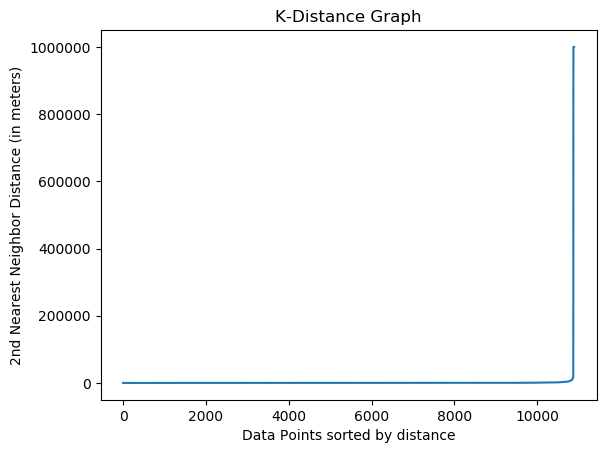

Suggested eps value in meters: 552.4148264979253
Suggested minPts value: 2
Estimated number of clusters: 928
Estimated number of noise points: 1090


In [5]:
# 排除太远的的点

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# ... [您的custom_metric和haversine_distance定义]

# 计算每个点到其他所有点的平均距离
avg_distances = []
for point in points:
    distances_to_other_points = [haversine_distance(point, other_point) for other_point in points]
    avg_distance = sum(distances_to_other_points) / len(distances_to_other_points)
    avg_distances.append(avg_distance)

# 设置一个阈值并排除那些平均距离较大的点
threshold = np.percentile(avg_distances, 90)  # 使用90th percentile作为阈值
filtered_points = np.array([point for idx, point in enumerate(points) if avg_distances[idx] <= threshold])
filtered_attributes = np.array([attr for idx, attr in enumerate(attributes) if avg_distances[idx] <= threshold])

# 使用NearestNeighbors来计算K距离图，以估计eps和minPts
K = 2
neigh = NearestNeighbors(n_neighbors=K, metric=custom_metric)
nbrs = neigh.fit(np.hstack((filtered_points, filtered_attributes)))
distances, indices = nbrs.kneighbors(np.hstack((filtered_points, filtered_attributes)))

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('2nd Nearest Neighbor Distance (in meters)')  
plt.show()

# 从K距离图中选择一个'elbow'作为eps的值
eps_suggestion_meters = np.percentile(distances, 90)
minPts_suggestion = K

print(f"Suggested eps value in meters: {eps_suggestion_meters}")  
print(f"Suggested minPts value: {minPts_suggestion}")

# 使用建议的eps和minPts进行DBSCAN聚类
clustering = DBSCAN(eps=eps_suggestion_meters, min_samples=minPts_suggestion, metric=custom_metric).fit(np.hstack((filtered_points, filtered_attributes)))

# 分析聚类结果
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 原始坐标
original_x = [point[0] for trajectory in data['轨迹'] for point in trajectory]
original_y = [point[1] for trajectory in data['轨迹'] for point in trajectory]

# 聚类后坐标
clustered_x = [point[0] for trajectory in data['新轨迹'] for point in trajectory]
clustered_y = [point[1] for trajectory in data['新轨迹'] for point in trajectory]

# 计算所有点的中位数
median_x = np.median(original_x + clustered_x)
median_y = np.median(original_y + clustered_y)

# 定义一个阈值，只显示与中位数距离在该阈值内的点
threshold = 5

# 筛选出与中位数距离在阈值内的点
filtered_original_points = [(x, y) for x, y in zip(original_x, original_y) if abs(x - median_x) < threshold and abs(y - median_y) < threshold]
filtered_clustered_points = [(x, y) for x, y in zip(clustered_x, clustered_y) if abs(x - median_x) < threshold and abs(y - median_y) < threshold]

filtered_original_x, filtered_original_y = zip(*filtered_original_points)
filtered_clustered_x, filtered_clustered_y = zip(*filtered_clustered_points)

plt.figure(figsize=(10, 10))

# 绘制筛选后的原始和聚类点
plt.scatter(filtered_original_x, filtered_original_y, c='green', label='Original Points', alpha=0.5)
plt.scatter(filtered_clustered_x, filtered_clustered_y, c='pink', label='Clustered Points', alpha=0.5)

plt.title('Comparison of Original and Clustered Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [12]:
# 使用之前提到的haversine_distance函数
differences = []
for orig_traj, clustered_traj in zip(data['轨迹'], data['新轨迹']):
    for orig_point, clustered_point in zip(orig_traj, clustered_traj):
        diff = haversine_distance(orig_point, clustered_point)
        differences.append(diff)


In [13]:
# 计算平均差异、最大差异和标准偏差
mean_diff = np.mean(differences)
max_diff = np.max(differences)
std_diff = np.std(differences)

print(f"Average Difference: {mean_diff:.2f} meters")
print(f"Maximum Difference: {max_diff:.2f} meters")
print(f"Standard Deviation of Differences: {std_diff:.2f} meters")


Average Difference: 4.40 meters
Maximum Difference: 143.88 meters
Standard Deviation of Differences: 10.18 meters


In [ ]:
# Average Difference: 0.53 meters
# 这意味着，原始点与其相应的聚类中心之间的平均距离差异为0.53米。换句话说，平均来看，每个点被移动了大约0.53米以进行聚类。

# Maximum Difference: 128.13 meters
# 这表示在所有点中，有一个点与其对应的聚类中心之间的距离差异达到了128.13米。这是所有点中移动距离最远的一个。

# Standard Deviation of Differences: 4.49 meters
# 标准偏差表示点与其聚类中心之间的距离差异的离散程度。一个4.49米的标准偏差意味着大多数点（大约68%）与其聚类中心之间的距离差异在平均差异的上下4.49米范围内，即在[0.53-4.49, 0.53+4.49]即[-3.96, 5.02]米之间。

# 结论：
# 大多数点与其聚类中心的距离差异相对较小（平均为0.53米，大部分点的差异在5.02米以内），这意味着聚类算法大体上做得很好，没有引入大量的偏移。

# 然而，有一些点（尤其是那些与聚类中心有最大差异的点）可能被移动了相对较远的距离（最大为128.13米）。这可能是由于这些点在空间上是离群点或与其他属性（如出行目的或用地类型）结合的方式使它们与其他点有所不同。

# 总体上，如果您的应用场景可以接受这种级别的空间偏移（例如，如果您正在进行大规模的分析，而不是精确的位置测量），那么这种聚类可能是可接受的。但是，如果您对位置精度有严格的要求，您可能需要重新考虑聚类参数或使用其他方法。

# 没有圆圈绘图

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def are_points_colinear(points):
    if len(points) < 3:
        return True
    A = points[0]
    B = points[1]
    for C in points[2:]:
        if np.linalg.det([[A[0]-C[0], A[1]-C[1]], 
                          [B[0]-C[0], B[1]-C[1]]]) != 0:
            return False
    return True

# 原始坐标
original_trajectories = data['轨迹'].tolist()

# 聚类后坐标
clustered_trajectories = data['新轨迹'].tolist()

changed_original_x = []
changed_original_y = []
changed_clustered_x = []
changed_clustered_y = []

for original_trajectory, clustered_trajectory in zip(original_trajectories, clustered_trajectories):
    for original_point, clustered_point in zip(original_trajectory, clustered_trajectory):
        if not np.array_equal(original_point, clustered_point):
            changed_original_x.append(original_point[0])
            changed_original_y.append(original_point[1])
            changed_clustered_x.append(clustered_point[0])
            changed_clustered_y.append(clustered_point[1])

plt.figure(figsize=(12, 12))

cluster_labels = np.unique(clustering.labels_)
for label in cluster_labels:
    if label != -1:
#         member_points = points[clustering.labels_ == label]
        member_points = filtered_points[clustering.labels_ == label]
        if not are_points_colinear(member_points) and member_points.shape[0] >= 3:
            try:
                hull = ConvexHull(member_points)
                plt.plot(member_points[hull.vertices, 0], member_points[hull.vertices, 1], 'c--', alpha=0.5)
                plt.fill(member_points[hull.vertices, 0], member_points[hull.vertices, 1], alpha=0.2)
            except:
                pass
        
        centroid = cluster_centroids[label]
        plt.scatter(centroid[0], centroid[1], c='green', s=100, marker='x', label=f'Centroid of Cluster {label}')

# 绘制改变的原始和聚类点
plt.scatter(changed_original_x, changed_original_y, c='blue', label='Original Changed Points', alpha=0.5)
plt.scatter(changed_clustered_x, changed_clustered_y, c='red', label='Clustered Changed Points', alpha=0.5)

# 绘制从原始点到聚类点的线，表示变化情况
for ox, oy, cx, cy in zip(changed_original_x, changed_original_y, changed_clustered_x, changed_clustered_y):
    plt.plot([ox, cx], [oy, cy], 'grey', linestyle='--', alpha=0.5)

plt.title('Comparison of Changed Original and Clustered Points with Cluster Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# 将图例移到更适合的位置
# plt.legend(loc='best')
# plt.tight_layout()
plt.show()


# 简单圆圈绘图

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 原始坐标
original_trajectories = data['轨迹'].tolist()

# 聚类后坐标
clustered_trajectories = data['新轨迹'].tolist()

plt.figure(figsize=(12, 12))

cluster_labels = np.unique(clustering.labels_)
for label in cluster_labels:
    if label != -1:
#         member_points = points[clustering.labels_ == label]
        member_points = filtered_points[clustering.labels_ == label]
        centroid = cluster_centroids[label]
        distances = np.linalg.norm(member_points - centroid, axis=1)
        radius = np.max(distances)
        
        circle = plt.Circle((centroid[0], centroid[1]), radius, color='c', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(circle)
        
        plt.scatter(member_points[:, 0], member_points[:, 1], c='blue', alpha=0.5)
        plt.scatter(centroid[0], centroid[1], c='green', s=100, marker='x')


plt.title('Original and Clustered Points with Cluster Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# 蓝色的点: 这些代表了聚类中的数据点。它们是原始数据点的子集，因为您在聚类时排除了轨迹的第一个点。
# 绿色的'x'标记: 这些代表了每个簇的中心点（也叫质心）。质心是聚类中所有点的平均位置。
# 青色的虚线圆: 这些圆形代表了每个簇的边界。圆的半径是从质心到簇内最远的点的距离。换句话说，每个圆都包含了其簇中的所有点。

In [1]:
%matplotlib qt

In [29]:
%matplotlib inline

# 有圆圈绘图

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 读取CSV文件
data = pd.read_csv("encoded_data_ceshi.csv")
# 原始坐标
original_trajectories = data['轨迹'].tolist()

# 聚类后坐标
clustered_trajectories = data['新轨迹'].tolist()

changed_original_x = []
changed_original_y = []
changed_clustered_x = []
changed_clustered_y = []

for original_trajectory, clustered_trajectory in zip(original_trajectories, clustered_trajectories):
    for original_point, clustered_point in zip(original_trajectory, clustered_trajectory):
        if not np.array_equal(original_point, clustered_point):
            changed_original_x.append(original_point[0])
            changed_original_y.append(original_point[1])
            changed_clustered_x.append(clustered_point[0])
            changed_clustered_y.append(clustered_point[1])

plt.figure(figsize=(12, 12))

cluster_labels = np.unique(clustering.labels_)
for label in cluster_labels:
    if label != -1:
#         member_points = points[clustering.labels_ == label]
        member_points = filtered_points[clustering.labels_ == label]
        centroid = cluster_centroids[label]
        distances = np.linalg.norm(member_points - centroid, axis=1)
        radius = np.max(distances)
        
        circle = plt.Circle((centroid[0], centroid[1]), radius, color='c', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(circle)
        
        plt.scatter(centroid[0], centroid[1], c='green', s=100, marker='x')

# 绘制改变的原始和聚类点
plt.scatter(changed_original_x, changed_original_y, c='blue', label='Original Changed Points', alpha=0.5)
plt.scatter(changed_clustered_x, changed_clustered_y, c='red', label='Clustered Changed Points', alpha=0.5)

# 绘制从原始点到聚类点的线，表示变化情况
for ox, oy, cx, cy in zip(changed_original_x, changed_original_y, changed_clustered_x, changed_clustered_y):
    plt.plot([ox, cx], [oy, cy], 'grey', linestyle='--', alpha=0.5)

plt.title('Comparison of Changed Original and Clustered Points with Cluster Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best')
plt.show()

IndexError: string index out of range

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 原始坐标
original_trajectories = data['轨迹'].tolist()

# 聚类后坐标
clustered_trajectories = data['新轨迹'].tolist()

changed_original_x = []
changed_original_y = []
changed_clustered_x = []
changed_clustered_y = []

for original_trajectory, clustered_trajectory in zip(original_trajectories, clustered_trajectories):
    for original_point, clustered_point in zip(original_trajectory, clustered_trajectory):
        if not np.array_equal(original_point, clustered_point):
            changed_original_x.append(original_point[0])
            changed_original_y.append(original_point[1])
            changed_clustered_x.append(clustered_point[0])
            changed_clustered_y.append(clustered_point[1])

plt.figure(figsize=(12, 12))

cluster_labels = np.unique(clustering.labels_)
for label in cluster_labels:
    if label != -1:
        member_points = points[clustering.labels_ == label]
        centroid = cluster_centroids[label]
        distances = np.linalg.norm(member_points - centroid, axis=1)
        radius = np.max(distances)
        
        circle = plt.Circle((centroid[0], centroid[1]), radius, color='c', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(circle)
        
        plt.scatter(centroid[0], centroid[1], c='green', s=100, marker='x')

# 绘制改变的原始和聚类点
plt.scatter(changed_original_x, changed_original_y, c='blue', label='Original Changed Points', alpha=0.5)
plt.scatter(changed_clustered_x, changed_clustered_y, c='red', label='Clustered Changed Points', alpha=0.5)

# 绘制从原始点到聚类点的线，表示变化情况
for ox, oy, cx, cy in zip(changed_original_x, changed_original_y, changed_clustered_x, changed_clustered_y):
    plt.plot([ox, cx], [oy, cy], 'grey', linestyle='--', alpha=0.5)
# 获取用地类型和出行目的
land_use_types = data['用地类型'].tolist()
travel_purposes = data['出行目的'].tolist()

# 遍历改变的原始坐标点
for ox, oy in zip(changed_original_x, changed_original_y):
    # 找到点在原始轨迹中的索引
    trajectory_index = -1
    t_idx = -1
    for temp_t_idx, trajectory in enumerate(original_trajectories):
        for p_idx, point in enumerate(trajectory):
            if np.array_equal([ox, oy], point):
                trajectory_index = p_idx
                t_idx = temp_t_idx
                break
        if trajectory_index != -1:
            break
    
    # 使用索引获取用地类型
    land_use = land_use_types[t_idx][trajectory_index]
    
    # 获取出行目的
    if 0 < trajectory_index < len(travel_purposes[t_idx]):
        travel_purpose = travel_purposes[t_idx][trajectory_index - 1]
        label_text = land_use + ', ' + travel_purpose
        plt.text(ox, oy, label_text, fontsize=9, ha='right')
    else:
        plt.text(ox, oy, land_use, fontsize=9, ha='right')

# 设置matplotlib字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.title('Comparison of Changed Original and Clustered Points with Cluster Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best')
plt.axis('equal')

plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# 原始坐标
original_trajectories = data['轨迹'].tolist()

# 聚类后坐标
clustered_trajectories = data['新轨迹'].tolist()

# 获取用地类型和出行目的
land_use_types = data['用地类型'].tolist()
travel_purposes = data['出行目的'].tolist()
member_ids = data['成员编号'].tolist()

# 为每一个(用地类型, 出行目的)组合分配一个颜色
all_combinations = set()
for lu_list, tp_list in zip(land_use_types, travel_purposes):
    for lu, tp in zip(lu_list, tp_list):
        all_combinations.add((lu, tp))

color_map = {combo: plt.cm.tab20(i) for i, combo in enumerate(all_combinations)}

plt.figure(figsize=(12, 12))

# 显示簇的边界和质心
for label in np.unique(clustering.labels_):
    if label != -1:
        member_points = points[clustering.labels_ == label]
#         member_points = filtered_points[clustering.labels_ == label]
        centroid = cluster_centroids[label]

        distances = np.linalg.norm(member_points - centroid, axis=1)
        radius = np.max(distances)
        
        circle = plt.Circle((centroid[0], centroid[1]), radius, color='c', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(circle)
        plt.scatter(centroid[0], centroid[1], c='green', s=100, marker='x')

        
        
# 绘制改变的原始和聚类点，并记录实际绘制的组合
drawn_combinations = set()
for original_trajectory, clustered_trajectory, lu_list, tp_list in zip(original_trajectories, clustered_trajectories, land_use_types, travel_purposes):
    for original_point, clustered_point, lu, tp, member_id in zip(original_trajectory, clustered_trajectory, lu_list, tp_list, member_ids):
        color = color_map[(lu, tp)]
        if not np.array_equal(original_point, clustered_point):
            plt.scatter(original_point[0], original_point[1], c=[color], alpha=0.5)
            plt.scatter(clustered_point[0], clustered_point[1], c=[color], alpha=0.5)
            plt.plot([original_point[0], clustered_point[0]], [original_point[1], clustered_point[1]], 'grey', linestyle='--', alpha=0.5)
            drawn_combinations.add((lu, tp))
            # 显示成员编号
            plt.text(original_point[0], original_point[1], f'Member ID: {member_id}', fontsize=9, ha='right', va='bottom')  # 修改这一行以显示成员编号
            # 显示用地类型和出行目的
            label_text = lu + ', ' + tp
            plt.text(original_point[0], original_point[1], label_text, fontsize=9, ha='right', va='top')  # 修改这一行以显示用地类型和出行目的


            
# 绘制从原始点到聚类点的线，表示变化情况
# for ox, oy, cx, cy in zip(changed_original_x, changed_original_y, changed_clustered_x, changed_clustered_y):
#     plt.plot([ox, cx], [oy, cy], 'grey', linestyle='--', alpha=0.5)
    
# 遍历改变的原始坐标点
# for ox, oy in zip(changed_original_x, changed_original_y):
#     # 找到点在原始轨迹中的索引
#     trajectory_index = -1
#     t_idx = -1
#     for temp_t_idx, trajectory in enumerate(original_trajectories):
#         for p_idx, point in enumerate(trajectory):
#             if np.array_equal([ox, oy], point):
#                 trajectory_index = p_idx
#                 t_idx = temp_t_idx
#                 break
#         if trajectory_index != -1:
#             break
    
#     # 使用索引获取用地类型
#     land_use = land_use_types[t_idx][trajectory_index]
    
#     # 获取出行目的
#     if 0 < trajectory_index < len(travel_purposes[t_idx]):
#         travel_purpose = travel_purposes[t_idx][trajectory_index - 1]
#         label_text = land_use + ', ' + travel_purpose
#         plt.text(ox, oy, label_text, fontsize=9, ha='right')
#     else:
#         plt.text(ox, oy, land_use, fontsize=9, ha='right')            
            
# 设置matplotlib字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建图例，只包含实际绘制到图中的组合
handles = {combo: plt.Line2D([0], [0], marker='o', color='w', label=combo[0] + ', ' + combo[1], markersize=10, markerfacecolor=color_map[combo]) for combo in drawn_combinations}
plt.legend(handles=handles.values(), loc='best')

plt.title('Clustered Points Colored by Land Use and Travel Purpose Combination')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')

plt.show()


{0: array([113.3325948 ,  22.39658219]), 1: array([113.31528069,  22.42227563]), 2: array([113.34558632,  22.37893053]), 3: array([113.27712516,  22.46923405]), 4: array([113.27978544,  22.4738595 ]), 5: array([113.27977126,  22.47387256]), 6: array([113.27809913,  22.47031496]), 7: array([113.2576073 ,  22.48939481]), 8: array([113.2885137 ,  22.47286395]), 9: array([113.3780775 ,  22.52779127]), 10: array([113.24234371,  22.69276923]), 11: array([113.2452208 ,  22.69791532]), 12: array([113.3141353 ,  22.42116192]), 13: array([113.3140263 ,  22.42169929]), 14: array([113.32229584,  22.67993192]), 15: array([113.28712154,  22.66954875]), 16: array([113.2759339 ,  22.69412515]), 17: array([113.24808112,  22.72792705]), 18: array([113.24695073,  22.72874123]), 19: array([113.251187 ,  22.7312227]), 20: array([113.2525071 ,  22.73418706]), 21: array([113.2579474 ,  22.68710848]), 22: array([113.28715304,  22.66949951]), 23: array([113.38888576,  22.51424864]), 24: array([113.3891254 ,  2

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57]
{0: array([113.3325948 ,  22.39658219]), 1: array([113.31528069,  22.42227563]), 2: array([113.34558632,  22.37893053]), 3: array([113.27712516,  22.46923405]), 4: array([113.27978544,  22.4738595 ]), 5: array([113.27977126,  22.47387256]), 6: array([113.27809913,  22.47031496]), 7: array([113.2576073 ,  22.48939481]), 8: array([113.2885137 ,  22.47286395]), 9: array([113.3780775 ,  22.52779127]), 10: array([113.24234371,  22.69276923]), 11: array([113.2452208 ,  22.69791532]), 12: array([113.3141353 ,  22.42116192]), 13: array([113.3140263 ,  22.42169929]), 14: array([113.32229584,  22.67993192]), 15: array([113.28712154,  22.66954875]), 16: array([113.2759339 ,  22.69412515]), 17: array([113.24808112,  22.72792705]), 18: array([113.24695073,  22.72874123]), 19: array([113.251187 ,  22.7312227]), 20: array(

{0: array([113.3325948 ,  22.39658219]), 1: array([113.31528069,  22.42227563]), 2: array([113.34558632,  22.37893053]), 3: array([113.27712516,  22.46923405]), 4: array([113.27978544,  22.4738595 ]), 5: array([113.27977126,  22.47387256]), 6: array([113.27809913,  22.47031496]), 7: array([113.2576073 ,  22.48939481]), 8: array([113.2885137 ,  22.47286395]), 9: array([113.3780775 ,  22.52779127]), 10: array([113.24234371,  22.69276923]), 11: array([113.2452208 ,  22.69791532]), 12: array([113.3141353 ,  22.42116192]), 13: array([113.3140263 ,  22.42169929]), 14: array([113.32229584,  22.67993192]), 15: array([113.28712154,  22.66954875]), 16: array([113.2759339 ,  22.69412515]), 17: array([113.24808112,  22.72792705]), 18: array([113.24695073,  22.72874123]), 19: array([113.251187 ,  22.7312227]), 20: array([113.2525071 ,  22.73418706]), 21: array([113.2579474 ,  22.68710848]), 22: array([113.28715304,  22.66949951]), 23: array([113.38888576,  22.51424864]), 24: array([113.3891254 ,  2